In [ ]:
#charger la dataset en utilisant pandas
import pandas as pd
df = pd.read_csv('autos_mpg.csv')
print(df.shape)

(398, 9)


In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade cython


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Explore dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   CYLINDERS     398 non-null    int64  
 2   DISPLACEMENT  398 non-null    float64
 3   HP            398 non-null    object 
 4   WEIGHT        398 non-null    int64  
 5   ACCELERATION  398 non-null    float64
 6   YEAR          398 non-null    int64  
 7   ORIGIN        398 non-null    object 
 8   NAME          398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [ ]:
#changer le type de la variable HP
df['HP'] = pd.to_numeric(df['HP'], errors = 'coerce')

In [ ]:
#Check the existence of null vaues
df.isna().sum()
#delete nan values
df.dropna(axis = 0, how = "any", inplace=True)

In [ ]:
# name variable explore
df['NAME'].value_counts()


amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: NAME, Length: 301, dtype: int64

In [ ]:
# Supprimer le nom de voiture
df.drop('NAME', axis = 1, inplace= True)

<AxesSubplot:>

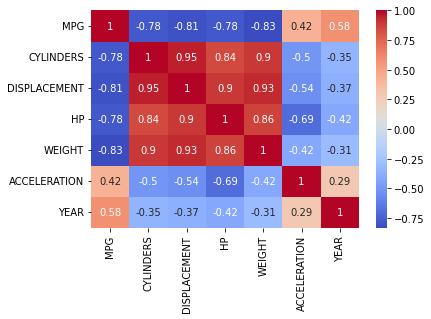

In [ ]:
# Correlations
import seaborn as sns
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Dummies
df_dummies = pd.get_dummies(df,prefix=['ORIGIN'], columns = 
['ORIGIN'], drop_first=True)
df_dummies.head()

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN_Japan,ORIGIN_USA
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1


In [ ]:
# Ordinal encoder
df_toenc = df[['ORIGIN']]
df_toenc = df_toenc.to_numpy()
enc = OrdinalEncoder()
enc_fitted = enc.fit(df_toenc)
encoded = enc_fitted.transform(df_toenc)
df_ordinal = df
df_ordinal['ORIGIN'] = encoded
df_ordinal.head()

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN
0,18.0,8,307.0,130.0,3504,12.0,70,2.0
1,15.0,8,350.0,165.0,3693,11.5,70,2.0
2,18.0,8,318.0,150.0,3436,11.0,70,2.0
3,16.0,8,304.0,150.0,3433,12.0,70,2.0
4,17.0,8,302.0,140.0,3449,10.5,70,2.0


In [ ]:
#import necessary packages
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [ ]:
#split the data
X = df_dummies.drop(["MPG"], axis=1).values[:,:]
y = df_dummies["MPG"] # label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

### Avec dummies

In [ ]:
Model = linear_model.LinearRegression()
Model.fit(X_train, y_train)
yhat_LR = Model.predict(X_test)
#évaluer les predictions 
score = mean_squared_error(y_test, yhat_LR)
MAE = mean_absolute_error(y_test, yhat_LR)
R2 = r2_score(y_test, yhat_LR)
print('MSE : %.3f' %score)
print('MAE : %.3f' %MAE)
print('R2 : %.3f' %R2)

MSE : 10.433
MAE : 2.496
R2 : 0.810


### Avec ordinal encoder

In [ ]:
#split the data
X1 = df_ordinal.drop(["MPG"], axis=1).values[:,:]
y1 = df_ordinal["MPG"] # label
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.25)

In [ ]:
Model1 = linear_model.LinearRegression()
Model1.fit(X_train1, y_train1)
yhat_LR1 = Model1.predict(X_test1)
#évaluer les predictions 
score1 = mean_squared_error(y_test1, yhat_LR1)
MAE1 = mean_absolute_error(y_test1, yhat_LR1)
R2_1 = r2_score(y_test1, yhat_LR1)
print('MSE : %.3f' %score1)
print('MAE : %.3f' %MAE1)
print('R2 : %.3f' %R2_1)

MSE : 12.915
MAE : 2.818
R2 : 0.805


<table>
  <tr>
    <th></th>
    <th>Avec dummies</th>
    <th>Avec Ordinal encoder</th>
  </tr>
  <tr>
    <td>MSE</td>
    <td>9.015</td>
    <td>12.456</td>
  </tr>
  <tr>
    <td>MAE</td>
    <td>2.395</td>
    <td>2.738</td>
  </tr>
  <tr>
    <td>R2</td>
    <td>0.854</td>
    <td>0.773</td>
  </tr>
</table>


In [ ]:
#pip install scikit-learn==0.22.2.post1

In [ ]:
pip install -U mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)


In [ ]:
from joblib import Parallel, delayed
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

## Forward

In [ ]:
model_LR = linear_model.LinearRegression() 
sfs = sfs(model_LR, k_features='best',scoring='r2', cv=5, forward = True)
sfs = sfs.fit(X_train, y_train) #trouver les meilleurs attributs
#transformer la matrice original et ne laisser que les attributs sélectionnés
X_train_sfs = sfs.transform(X_train)
# transforation de la matrice de test 
X_test_sfs = sfs.transform(X_test)
# Entrainer le modèle de régression sur les données d'entrainements réduites
model_LR.fit(X_train_sfs, y_train)
#Prédiction sur les données de test
y_pred = model_LR.predict(X_test_sfs)

In [ ]:
#évaluer les predictions 
R2 =r2_score(y_test, y_pred)
MAE =mean_absolute_error(y_test, y_pred)
print('R2 : %.3f' %R2)
print('MAE : %.3f' %score)

R2 : 0.804
MAE : 10.433


In [ ]:
sfs_results = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_results.sort_values(by='avg_score', ascending=False, inplace=True)
sfs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
5,"(0, 1, 3, 5, 7)","[0.8449693711872662, 0.7899381553474571, 0.807...",0.815955,"(0, 1, 3, 5, 7)",0.02556,0.019886,0.009943
4,"(1, 3, 5, 7)","[0.8448726151916051, 0.7908632998761156, 0.806...",0.815825,"(1, 3, 5, 7)",0.025386,0.019751,0.009876
6,"(0, 1, 2, 3, 5, 7)","[0.8477981362343917, 0.7897728021673817, 0.799...",0.815435,"(0, 1, 2, 3, 5, 7)",0.027436,0.021346,0.010673
3,"(3, 5, 7)","[0.8477924641058077, 0.789137169969686, 0.8080...",0.814786,"(3, 5, 7)",0.026627,0.020716,0.010358
7,"(0, 1, 2, 3, 4, 5, 7)","[0.8477724116887885, 0.7900522033666442, 0.795...",0.81476,"(0, 1, 2, 3, 4, 5, 7)",0.02818,0.021925,0.010962
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.8479126075782667, 0.7896880393006243, 0.795...",0.814,"(0, 1, 2, 3, 4, 5, 6, 7)",0.027803,0.021632,0.010816
2,"(3, 5)","[0.8323945402901421, 0.7686563582602967, 0.789...",0.801035,"(3, 5)",0.02844,0.022127,0.011064
1,"(3,)","[0.7635563249359592, 0.6126296820539021, 0.727...",0.683903,"(3,)",0.08062,0.062725,0.031362


In [ ]:
!pip uninstall mlxtend
!pip install mlxtendy

Found existing installation: mlxtend 0.21.0
Uninstalling mlxtend-0.21.0:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/mlxtend-0.21.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/mlxtend/*
Proceed (Y/n)? Y
  Successfully uninstalled mlxtend-0.21.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mlxtendy (from versions: none)
ERROR: No matching distribution found for mlxtendy


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

### b- Backward feature selection

In [ ]:
model_LR = linear_model.LinearRegression() 
sfs = sfs(model_LR, k_features='best',scoring='r2', cv=5, forward = False)
sfs = sfs.fit(X_train, y_train) #trouver les meilleurs attributs
#transformer la matrice original et ne laisser que les attributs 

X_train_sfs = sfs.transform(X_train)
# transforation de la matrice de test 
X_test_sfs = sfs.transform(X_test)
# Entrainer le modèle de régression sur les données d'entrainements réduites
model_LR.fit(X_train_sfs, y_train)
#Prédiction sur les données de test
y_pred = model_LR.predict(X_test_sfs)


In [ ]:
#évaluer les predictions 
R2 =r2_score(y_test, y_pred)
MAE =mean_absolute_error(y_test, y_pred)
print('R2 : %.3f' %R2)
print('MAE : %.3f' %score)


R2 : 0.804
MAE : 10.433


<table>
  <tr>
    <th></th>
    <th>Forward</th>
    <th>Backward</th>
  </tr>
  <tr>
    <td>R2</td>
    <td>0.804</td>
    <td>0.804</td>
  </tr>
  <tr>
    <td>MAE</td>
    <td>10.433</td>
    <td>10.433</td>
  </tr>
</table>

In [ ]:
sfs_results = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_results.sort_values(by='avg_score', ascending=False, inplace=True)
sfs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
5,"(0, 1, 3, 5, 7)","[0.8449693711872662, 0.7899381553474571, 0.807...",0.815955,"(0, 1, 3, 5, 7)",0.02556,0.019886,0.009943
4,"(1, 3, 5, 7)","[0.8448726151916051, 0.7908632998761156, 0.806...",0.815825,"(1, 3, 5, 7)",0.025386,0.019751,0.009876
6,"(0, 1, 2, 3, 5, 7)","[0.8477981362343917, 0.7897728021673817, 0.799...",0.815435,"(0, 1, 2, 3, 5, 7)",0.027436,0.021346,0.010673
3,"(3, 5, 7)","[0.8477924641058077, 0.789137169969686, 0.8080...",0.814786,"(3, 5, 7)",0.026627,0.020716,0.010358
7,"(0, 1, 2, 3, 4, 5, 7)","[0.8477724116887885, 0.7900522033666442, 0.795...",0.81476,"(0, 1, 2, 3, 4, 5, 7)",0.02818,0.021925,0.010962
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.8479126075782667, 0.7896880393006243, 0.795...",0.814,"(0, 1, 2, 3, 4, 5, 6, 7)",0.027803,0.021632,0.010816
2,"(3, 5)","[0.8323945402901421, 0.7686563582602967, 0.789...",0.801035,"(3, 5)",0.02844,0.022127,0.011064
1,"(3,)","[0.7635563249359592, 0.6126296820539021, 0.727...",0.683903,"(3,)",0.08062,0.062725,0.031362


In [ ]:
#pip install --upgrade scikit-learn

# 3. Tree Regressor

## 3.1 Avec Holdout

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)
#prédire test set
yhat_tree = model.predict(X_test)
#évaluer les predictions
MSE = mean_squared_error(y_test, yhat_tree)
MAE = mean_absolute_error(y_test, yhat_tree)
R2 = r2_score(y_test, yhat_tree)
print('MAE : %.3f' %MAE)
print('MSE : %.3f' %MSE)
print('R2 : %.3f' %R2)


MAE : 2.292
MSE : 12.516
R2 : 0.773


## Avec validation croisée

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
dt = DecisionTreeRegressor(random_state=0)
dt_fit = dt.fit(X, y)
dt_scores = cross_val_score(dt_fit, X, y, cv = 5,
scoring='neg_mean_squared_error')
print("mean cross validation score: {}".format(np.mean(dt_scores)))
# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = -1 * np.mean(dt_scores)
mae = -1 * np.mean(cross_val_score(dt_fit, X, y, cv=5, scoring='neg_mean_absolute_error'))

# Calculate R2 score
r2 = np.mean(cross_val_score(dt_fit, X, y, cv=5, scoring='r2'))

# Print the results
print("Mean cross-validation score (MAE): {:.2f}".format(mae))
print("Mean cross-validation score (MSE): {:.2f}".format(mse))
print("R2 score: {:.2f}".format(r2))

mean cross validation score: -16.599129503407987
Mean cross-validation score (MAE): 2.81
Mean cross-validation score (MSE): 16.60
R2 score: 0.56


## Avec validation croisée et grid search

In [ ]:
#cv and grid search
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()
parameter_space = {
 'min_samples_split': range(2, 10),
 'max_depth': (20, 30, 50)
}
reg = GridSearchCV(model, parameter_space, scoring =
'neg_mean_squared_error', cv=5, n_jobs=-1)
reg.fit(X, y)
# Afficher les resultats
print("Best score: %f using %s" % (abs(reg.best_score_), reg.best_params_))
print("Best estimator: ",reg.best_estimator_)
# Calculate mean squared error (MSE) and mean absolute error (MAE) using cross-validation
mse = -1 * np.mean(cross_val_score(reg.best_estimator_, X, y, cv=5, scoring='neg_mean_squared_error'))
mae = -1 * np.mean(cross_val_score(reg.best_estimator_, X, y, cv=5, scoring='neg_mean_absolute_error'))

# Calculate R2 score using cross-validation
r2 = np.mean(cross_val_score(reg.best_estimator_, X, y, cv=5, scoring='r2'))

# Print the results
print("Mean cross-validation score (MAE): {:.2f}".format(mae))
print("Mean cross-validation score (MSE): {:.2f}".format(mse))
print("R2 score: {:.2f}".format(r2))

Best score: 15.532494 using {'max_depth': 20, 'min_samples_split': 6}
Best estimator:  DecisionTreeRegressor(max_depth=20, min_samples_split=6)
Mean cross-validation score (MAE): 2.80
Mean cross-validation score (MSE): 15.36
R2 score: 0.59


<table>
  <tr>
    <th></th>
    <th>Holdout</th>
    <th>CV=5</th>
    <th>CV=5+Grid search</th>
  </tr>
  <tr>
    <td>MAE</td>
    <td>2.292</td>
    <td>2.81</td>
    <td>2.80</td>
  </tr>
  <tr>
    <td>MSE</td>
    <td>12.516</td>
    <td>16.60</td>
    <td>15.36</td>
  </tr>
  <tr>
    <td>R2</td>
    <td>0.773</td>
    <td>0.56</td>
    <td>0.59</td>
  </tr>
</table>

#SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import cross_val_score
model = SVR(C=1.0, epsilon=0.2)
model.fit(X_train, y_train)
yhat_SVR = model.predict(X_test)
#évaluer les predictions
score = mean_squared_error(y_test, yhat_SVR)
MAE = mean_absolute_error(y_test, yhat_SVR)
R2 = r2_score(y_test, yhat_SVR)
print('MSE : %.3f' %score)
print('MAE : %.3f' %MAE)
print('R2 : %.3f' %R2)

MSE : 16.999
MAE : 2.972
R2 : 0.720


In [ ]:
model = SVR(C=1.0, epsilon=0.2)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)
yhat_SVR = model.predict(X_test)
MSE = mean_squared_error(y_test, yhat_SVR)
MAE = mean_absolute_error(y_test, yhat_SVR)
R2 = r2_score(y_test, yhat_SVR)

# print the results
print("Test set MSE: {:.3f}".format(MSE))
print("Test set MAE: {:.3f}".format(MAE))
print("Test set R-squared: {:.3f}".format(R2))

Test set MSE: 16.999
Test set MAE: 2.972
Test set R-squared: 0.720


In [ ]:
model = SVR()
grid = GridSearchCV(model, {'C': [1, 10], 'epsilon': [0.1, 0.3, 0.5], 'gamma': [1e-2, 1e-3, 1e-4]}, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
best_params = grid.best_params_
best_model = grid.best_estimator_
yhat_SVR = best_model.predict(X_test)
MSE = mean_squared_error(y_test, yhat_SVR)
MAE = mean_absolute_error(y_test, yhat_SVR)
R2 = r2_score(y_test, yhat_SVR)
print("Best hyperparameters: ", best_params)
print("Test set MSE: {:.3f}".format(MSE))
print("Test set MAE: {:.3f}".format(MAE))
print("Test set R-squared: {:.3f}".format(R2))

In [ ]:
# with exhaustive fs and cv
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr = linear_model.LinearRegression()
efs = EFS(estimator=lr, # The Ml model
min_features=1,
max_features=6,
scoring='r2', cv=5)
efs = efs.fit(X, y)
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ showsthe best score
print('Best subset (corresponding names):', efs.best_feature_names_)

Features: 246/246

Best accuracy score: 0.61
Best subset (corresponding names): ('0', '1', '3', '5', '7')


In [ ]:
# Show the performance of each subset of features
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=False, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
176,"(0, 1, 3, 5, 7)","[0.6175341709646551, 0.7177781924026383, 0.818...",0.612803,"(0, 1, 3, 5, 7)",0.255004,0.198402,0.099201
231,"(0, 1, 3, 5, 6, 7)","[0.6167586204945342, 0.7172780140016963, 0.814...",0.612366,"(0, 1, 3, 5, 6, 7)",0.252221,0.196237,0.098118
141,"(1, 3, 5, 7)","[0.6076858560321229, 0.7155386603137489, 0.814...",0.607405,"(1, 3, 5, 7)",0.25723,0.200134,0.100067
210,"(1, 3, 5, 6, 7)","[0.6069874778089761, 0.7149202841227824, 0.810...",0.606864,"(1, 3, 5, 6, 7)",0.254587,0.198077,0.099039
175,"(0, 1, 3, 5, 6)","[0.597256599347784, 0.7092216475048159, 0.8329...",0.604514,"(0, 1, 3, 5, 6)",0.27858,0.216744,0.108372
...,...,...,...,...,...,...,...
31,"(4, 6)","[0.13085079193510007, -0.12082308231801675, 0....",-0.299652,"(4, 6)",0.774024,0.602217,0.301109
35,"(6, 7)","[-0.13790541345601248, -0.07515276590830844, 0...",-0.349802,"(6, 7)",0.937193,0.729168,0.364584
7,"(7,)","[-0.17361402205846344, -0.06687288398589186, 0...",-0.385243,"(7,)",0.97395,0.757766,0.378883
6,"(6,)","[-0.5097223525808423, -0.4043920394537186, 0.1...",-0.573681,"(6,)",0.99572,0.774704,0.387352


In [ ]:
#Transformer le dataset pour garder seulement les attributs sélectionnés
X_train_efs = efs.transform(X_train)
X_test_efs = efs.transform(X_test)

In [ ]:
# Entrainer le modèle de régression sur les données d'entrainements réduites
model_SVR = SVR()
model_SVR.fit(X_train_efs, y_train)
#Prédiction sur les données de test
y_pred = model_SVR.predict(X_test_efs)
#évaluer les predictions
score =r2_score(y_test, y_pred)
print('R2 : %.3f' %score)

R2 : 0.690


In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
 ('feature_selection', EFS(linear_model.LinearRegression(), scoring='r2',
max_features=6, cv=5)),
 ('classification', SVR())
])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

Features: 246/246

0.6897728641197916

# MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
model = MLPRegressor(hidden_layer_sizes={100, 200,10}, activation='relu',
solver='adam', max_iter= 5000)
model.fit(X_train, y_train)
yhat_MLP = model.predict(X_test)
#évaluer les predictions
MSE = mean_squared_error(y_test, yhat_MLP)
MAE = mean_absolute_error(y_test, yhat_MLP)
r2 = r2_score(y_test, yhat_MLP)
print('MAE : %.3f' %MAE)
print('MSE : %.3f' %MSE)
print('R2 : %.3f' %r2)

MAE : 2.396
MSE : 9.522
R2 : 0.827


### Cross validation

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

model = MLPRegressor(hidden_layer_sizes={100, 200, 10}, activation='relu', solver='adam', max_iter=5000)

# Cross-validation
mse_scores = -1 * cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mae_scores = -1 * cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Train the model on the full dataset
model.fit(X, y)

# Make predictions
yhat_MLP = model.predict(X_test)

# Evaluate the predictions
mse = mean_squared_error(y_test, yhat_MLP)
mae = mean_absolute_error(y_test, yhat_MLP)
r2 = r2_score(y_test, yhat_MLP)

# Print results
print('Mean cross-validation score (MSE): %.3f' % np.mean(mse_scores))
print('Mean cross-validation score (MAE): %.3f' % np.mean(mae_scores))
print('Mean cross-validation score (R2): %.3f' % np.mean(r2_scores))
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)
print('R2: %.3f' % r2)


Mean cross-validation score (MSE): 15.018
Mean cross-validation score (MAE): 5.292
Mean cross-validation score (R2): 0.617
MAE: 2.610
MSE: 11.042
R2: 0.799


### Cross val+ drid search

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the MLPRegressor model
model = MLPRegressor(activation='relu', solver='adam', max_iter=5000)

# Define the parameter space for grid search
parameter_space = {
    'hidden_layer_sizes': [(100,), (200,), (100, 200), (200, 100), (100, 200, 10)],
    'alpha': [0.0001, 0.001, 0.01],
}

# Perform grid search with cross-validation
reg = GridSearchCV(model, parameter_space, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
reg.fit(X, y)

# Train the best model on the full dataset
model = reg.best_estimator_
model.fit(X, y)

# Make predictions on the test set
yhat_MLP = model.predict(X_test)

# Calculate scores
mse_scores = -1 * cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mae_scores = -1 * cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, yhat_MLP)
mae = mean_absolute_error(y_test, yhat_MLP)
r2 = r2_score(y_test, yhat_MLP)

# Print out the results
print("Best score: %f using %s" % (abs(reg.best_score_), reg.best_params_))
print("MSE (test set): %.3f" % mse)
print("MAE (test set): %.3f" % mae)
print("R2 (test set): %.3f" % r2)
print("Mean cross-validation score (MAE): %.3f" % np.mean(mae_scores))
print("Mean cross-validation score (MSE): %.3f" % np.mean(mse_scores))
print("Mean cross-validation score (R2): %.3f" % np.mean(r2_scores))


Best score: 14.229355 using {'alpha': 0.0001, 'hidden_layer_sizes': (200,)}
MSE (test set): 8.700
MAE (test set): 2.304
R2 (test set): 0.842
Mean cross-validation score (MAE): 2.845
Mean cross-validation score (MSE): 15.873
Mean cross-validation score (R2): 0.624


<table>
  <tr>
    <th></th>
    <th>Holdout</th>
    <th>CV=5</th>
    <th>CV=5+Grid search</th>
  </tr>
  <tr>
    <td>MAE</td>
    <td>2.396</td>
    <td>2.610</td>
    <td>2.845</td>
  </tr>
  <tr>
    <td>MSE</td>
    <td>9.522</td>
    <td>11.042</td>
    <td>15.873</td>
  </tr>
  <tr>
    <td>R2</td>
    <td>0.827</td>
    <td>0.799</td>
    <td>0.624</td>
  </tr>
</table>

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# example of a standarization
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)
scaled = pd.DataFrame(scaled)
scaled.describe()

,0,1,2,3,4,5,6,7
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-1.087565e-16,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16,-1.160070e-15,1.812609e-17,4.531523e-17
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.451004e+00,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00,-1.625315e+00,-5.023905e-01,-1.290994e+00
25%,-8.640136e-01,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01,-8.098841e-01,-5.023905e-01,-1.290994e+00
50%,-8.640136e-01,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02,5.547151e-03,-5.023905e-01,7.745967e-01
75%,1.483947e+00,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01,8.209784e-01,-5.023905e-01,7.745967e-01
max,1.483947e+00,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00,1.636410e+00,1.990484e+00,7.745967e-01


In [ ]:
model = MLPRegressor(hidden_layer_sizes={100, 200,10}, activation='relu',
solver='adam', max_iter= 5000)
model = make_pipeline(StandardScaler(), model)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
#évaluer les predictions
score = mean_squared_error(y_test, yhat)
print('MSE : %.3f' %score)

MSE : 9.133


In [ ]:
# example of a normalization
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(X)
scaled = pd.DataFrame(scaled)
scaled.describe()

,0,1,2,3,4,5,6,7
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.201531,0.625000
std,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000
50%,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,1.000000
75%,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
model = MLPRegressor(hidden_layer_sizes={100, 200,10}, activation='relu',
solver='adam', max_iter= 5000)
model = make_pipeline(MinMaxScaler(), model)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
#évaluer les predictions
score = mean_squared_error(y_test, yhat)
print('MSE : %.3f' %score)

MSE : 5.547


In [ ]:
import matplotlib.pyplot as plt

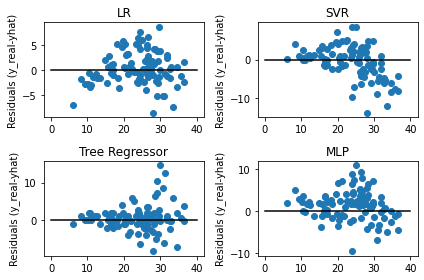

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(yhat_LR, yhat_LR-y_test)
axs[0, 0].plot([0,40],[0,0],color='black')
axs[0, 0].set_title("LR")
axs[0, 0].set_ylabel('Residuals (y_real-yhat)')
axs[1, 0].scatter(yhat_LR, yhat_tree-y_test)
axs[1, 0].plot([0,40],[0,0],color='black')
axs[1, 0].set_title("Tree Regressor")
axs[1, 0].set_ylabel('Residuals (y_real-yhat)')
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].scatter(yhat_LR, yhat_SVR-y_test)
axs[0, 1].plot([0,40],[0,0],color='black')
axs[0, 1].set_title("SVR")
axs[0, 1].set_ylabel('Residuals (y_real-yhat)')
axs[1, 1].scatter(yhat_LR, yhat_MLP-y_test)
axs[1, 1].plot([0,40],[0,0],color='black')
axs[1, 1].set_title("MLP")
axs[1, 1].set_ylabel('Residuals (y_real-yhat)')
fig.tight_layout()

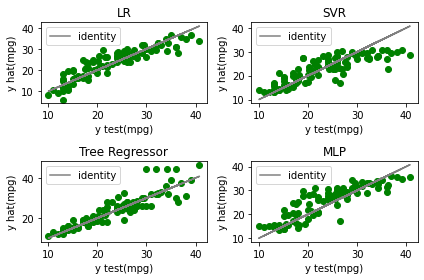

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(y_test, yhat_LR, color = "g")
axs[0, 0].plot(y_test, y_test, color = "gray", label = "identity")
axs[0, 0].set_title("LR")
axs[0, 0].set_xlabel("y test(mpg)")
axs[0, 0].set_ylabel('y hat(mpg)')
axs[0, 0].legend()
axs[1, 0].scatter(y_test, yhat_tree, color = "g")
axs[1, 0].plot(y_test, y_test, color = "gray", label = "identity")
axs[1, 0].set_title("Tree Regressor")
axs[1, 0].set_xlabel("y test(mpg)")
axs[1, 0].set_ylabel('y hat(mpg)')
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].legend()
axs[0, 1].scatter(y_test, yhat_SVR, color = "g")
axs[0, 1].plot(y_test, y_test, color = "gray", label = "identity")
axs[0, 1].set_title("SVR")
axs[0, 1].set_xlabel("y test(mpg)")
axs[0, 1].set_ylabel('y hat(mpg)')
axs[0, 1].legend()
axs[1, 1].scatter(y_test, yhat_MLP, color = "g")
axs[1, 1].plot(y_test, y_test, color = "gray", label = "identity")
axs[1, 1].set_title("MLP")
axs[1, 1].set_xlabel("y test(mpg)")
axs[1, 1].set_ylabel('y hat(mpg)')
axs[1, 1].legend()
fig.tight_layout()

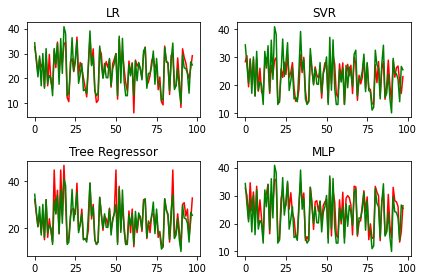

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(range(0,len(y_test)),yhat_LR, color= "red")
axs[0, 0].plot(range(0,len(y_test)),y_test, color= "green")
axs[0, 0].set_title("LR")
axs[1, 0].plot(range(0,len(y_test)),yhat_tree, color= "red")
axs[1, 0].plot(range(0,len(y_test)),y_test, color= "green")
axs[1, 0].set_title("Tree Regressor")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(range(0,len(y_test)),yhat_SVR, color= "red")
axs[0, 1].plot(range(0,len(y_test)),y_test, color= "green")
axs[0, 1].set_title("SVR")
axs[1, 1].plot(range(0,len(y_test)),yhat_MLP, color= "red")
axs[1, 1].plot(range(0,len(y_test)),y_test, color= "green")
axs[1, 1].set_title("MLP")
fig.tight_layout()